In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
LogisticRegression
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report

In [4]:
df = pd.read_csv(r'https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv')
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [5]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [7]:
pd.get_dummies(df['Workclass']).sum()

 ?                    1836
 Federal-gov           960
 Local-gov            2093
 Never-worked            7
 Private             22696
 Self-emp-inc         1116
 Self-emp-not-inc     2541
 State-gov            1297
 Without-pay            14
dtype: int64

We can obesrve there are 1836 null values in this column

In [8]:
pd.get_dummies(df['Education']).sum()

 10th              933
 11th             1175
 12th              433
 1st-4th           168
 5th-6th           333
 7th-8th           646
 9th               514
 Assoc-acdm       1067
 Assoc-voc        1382
 Bachelors        5354
 Doctorate         413
 HS-grad         10501
 Masters          1723
 Preschool          51
 Prof-school       576
 Some-college     7291
dtype: int64

In [9]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [10]:
pd.get_dummies(df['Education_num']).sum()

1        51
2       168
3       333
4       646
5       514
6       933
7      1175
8       433
9     10501
10     7291
11     1382
12     1067
13     5354
14     1723
15      576
16      413
dtype: int64

We can observe Education and Education number gives us same information we can drop any of these two columns. In this case we will drop Education column.

In [11]:
pd.get_dummies(df['Marital_status']).sum()

 Divorced                  4443
 Married-AF-spouse           23
 Married-civ-spouse       14976
 Married-spouse-absent      418
 Never-married            10682
 Separated                 1025
 Widowed                    993
dtype: int64

We can observe data is of object type and we need to convert the data using labelencoder.

In [12]:
pd.get_dummies(df['Occupation']).sum()

 ?                    1843
 Adm-clerical         3769
 Armed-Forces            9
 Craft-repair         4099
 Exec-managerial      4066
 Farming-fishing       994
 Handlers-cleaners    1370
 Machine-op-inspct    2002
 Other-service        3295
 Priv-house-serv       149
 Prof-specialty       4140
 Protective-serv       649
 Sales                3650
 Tech-support          928
 Transport-moving     1597
dtype: int64

We can observe data is of object type and has 1843 null values.

In [13]:
pd.get_dummies(df['Relationship']).sum()

 Husband           13193
 Not-in-family      8304
 Other-relative      981
 Own-child          5068
 Unmarried          3446
 Wife               1568
dtype: int64

Data is of object type and needs to be converted.

In [14]:
pd.get_dummies(df['Race']).sum()

 Amer-Indian-Eskimo      311
 Asian-Pac-Islander     1039
 Black                  3124
 Other                   271
 White                 27815
dtype: int64

In [15]:
pd.get_dummies(df['Sex']).sum()

 Female    10771
 Male      21789
dtype: int64

In [16]:
pd.get_dummies(df['Native_country']).sum()

 ?                               583
 Cambodia                         19
 Canada                          121
 China                            75
 Columbia                         59
 Cuba                             95
 Dominican-Republic               70
 Ecuador                          28
 El-Salvador                     106
 England                          90
 France                           29
 Germany                         137
 Greece                           29
 Guatemala                        64
 Haiti                            44
 Holand-Netherlands                1
 Honduras                         13
 Hong                             20
 Hungary                          13
 India                           100
 Iran                             43
 Ireland                          24
 Italy                            73
 Jamaica                          81
 Japan                            62
 Laos                             18
 Mexico                          643
 

We can observe 583 null values in this column

In [17]:
pd.get_dummies(df['Income']).sum()

 <=50K    24719
 >50K      7841
dtype: int64

Observations:
1)There are null values in Workclass,Occupation and Native_country columns.
2)LabelEncoder will be used to convert categorical data.
3)Target column - Income needs to be balanced.

Handling missing values

We will drop the rows with '?' values. Columns with value '?' are categorical and if we replace the data it can be biased hence dropping rows.

In [18]:
df.drop(df[df['Workclass'] == ' ?'].index,inplace=True)
pd.get_dummies(df['Workclass']).sum()

 Federal-gov           960
 Local-gov            2093
 Never-worked            7
 Private             22696
 Self-emp-inc         1116
 Self-emp-not-inc     2541
 State-gov            1297
 Without-pay            14
dtype: int64

In [19]:
df.drop(df[df['Native_country'] == ' ?'].index,inplace=True)
pd.get_dummies(df['Native_country']).sum()

 Cambodia                         18
 Canada                          107
 China                            68
 Columbia                         56
 Cuba                             92
 Dominican-Republic               67
 Ecuador                          27
 El-Salvador                     100
 England                          86
 France                           27
 Germany                         128
 Greece                           29
 Guatemala                        63
 Haiti                            42
 Holand-Netherlands                1
 Honduras                         12
 Hong                             19
 Hungary                          13
 India                           100
 Iran                             42
 Ireland                          24
 Italy                            68
 Jamaica                          80
 Japan                            59
 Laos                             17
 Mexico                          610
 Nicaragua                        33
 

In [20]:
df.drop(df[df['Occupation'] == ' ?'].index,inplace=True)
pd.get_dummies(df['Occupation']).sum()

 Adm-clerical         3720
 Armed-Forces            9
 Craft-repair         4030
 Exec-managerial      3992
 Farming-fishing       989
 Handlers-cleaners    1350
 Machine-op-inspct    1966
 Other-service        3212
 Priv-house-serv       143
 Prof-specialty       4038
 Protective-serv       644
 Sales                3584
 Tech-support          912
 Transport-moving     1572
dtype: int64

In [21]:
df.shape

(30161, 15)

Percentage Data Loss

In [22]:
data_lost = ((32560-30161)/32560)*100
data_lost

7.367936117936118

Using LabelEncoder

In [23]:
df['Workclass'] = le.fit_transform(df['Workclass'])
df['Workclass'].value_counts()

2    22286
4     2499
1     2067
5     1278
3     1074
0      943
6       14
Name: Workclass, dtype: int64

In [24]:
df['Occupation'] = le.fit_transform(df['Occupation'])
df['Occupation'].value_counts()

9     4038
2     4030
3     3992
0     3720
11    3584
7     3212
6     1966
13    1572
5     1350
4      989
12     912
10     644
8      143
1        9
Name: Occupation, dtype: int64

In [25]:
df['Marital_status'] = le.fit_transform(df['Marital_status'])
df['Marital_status'].value_counts()

2    14065
4     9725
0     4214
5      939
6      827
3      370
1       21
Name: Marital_status, dtype: int64

In [26]:
df['Relationship'] = le.fit_transform(df['Relationship'])
df['Relationship'].value_counts()

0    12463
1     7725
3     4466
4     3212
5     1406
2      889
Name: Relationship, dtype: int64

In [27]:
df['Race'] = le.fit_transform(df['Race'])
df['Race'].value_counts()

4    25932
2     2817
1      895
0      286
3      231
Name: Race, dtype: int64

In [28]:
df['Sex'] = le.fit_transform(df['Sex'])
df['Sex'].value_counts()

1    20379
0     9782
Name: Sex, dtype: int64

In [29]:
df['Native_country'] = le.fit_transform(df['Native_country'])
df['Native_country'].value_counts()

38    27503
25      610
29      188
10      128
32      109
1       107
18      100
7       100
4        92
8        86
22       80
34       71
2        68
21       68
5        67
39       64
12       63
23       59
30       56
3        56
19       42
35       42
13       42
31       34
26       33
28       30
11       29
9        27
6        27
20       24
16       19
0        18
37       18
36       17
24       17
40       16
27       14
17       13
15       12
33       11
14        1
Name: Native_country, dtype: int64

In [30]:
df['Income'] = le.fit_transform(df['Income'])
df['Income'].value_counts()

0    22653
1     7508
Name: Income, dtype: int64

In [31]:
df.describe()

,Age,Workclass,Fnlwgt,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
count,30161.000000,30161.000000,3.016100e+04,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000
mean,38.437883,2.199231,1.897976e+05,10.121216,2.580087,5.960048,1.418355,3.678592,0.675674,1091.971984,88.375419,40.931269,36.382514,0.248931
std,13.134882,0.953804,1.056527e+05,2.549983,1.498018,4.029487,1.601363,0.834721,0.468130,7406.466659,404.304753,11.980182,6.105467,0.432401
min,17.000000,0.000000,1.376900e+04,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,28.000000,2.000000,1.176280e+05,9.000000,2.000000,2.000000,0.000000,4.000000,0.000000,0.000000,0.000000,40.000000,38.000000,0.000000
50%,37.000000,2.000000,1.784290e+05,10.000000,2.000000,6.000000,1.000000,4.000000,1.000000,0.000000,0.000000,40.000000,38.000000,0.000000
75%,47.000000,2.000000,2.376300e+05,13.000000,4.000000,9.000000,3.000000,4.000000,1.000000,0.000000,0.000000,45.000000,38.000000,0.000000
max,90.000000,6.000000,1.484705e+06,16.000000,6.000000,13.000000,5.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000,40.000000,1.000000


Key Observations

1) Slight difference in mean and 50% indicates skewnwss in data.
2) There is difference in 75% and max values which indicates outliers.

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Workclass'}>,
        <AxesSubplot:title={'center':'Fnlwgt'}>,
        <AxesSubplot:title={'center':'Education_num'}>,
        <AxesSubplot:title={'center':'Marital_status'}>,
        <AxesSubplot:title={'center':'Occupation'}>],
       [<AxesSubplot:title={'center':'Relationship'}>,
        <AxesSubplot:title={'center':'Race'}>,
        <AxesSubplot:title={'center':'Sex'}>,
        <AxesSubplot:title={'center':'Capital_gain'}>,
        <AxesSubplot:title={'center':'Capital_loss'}>,
        <AxesSubplot:title={'center':'Hours_per_week'}>],
       [<AxesSubplot:title={'center':'Native_country'}>,
        <AxesSubplot:title={'center':'Income'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

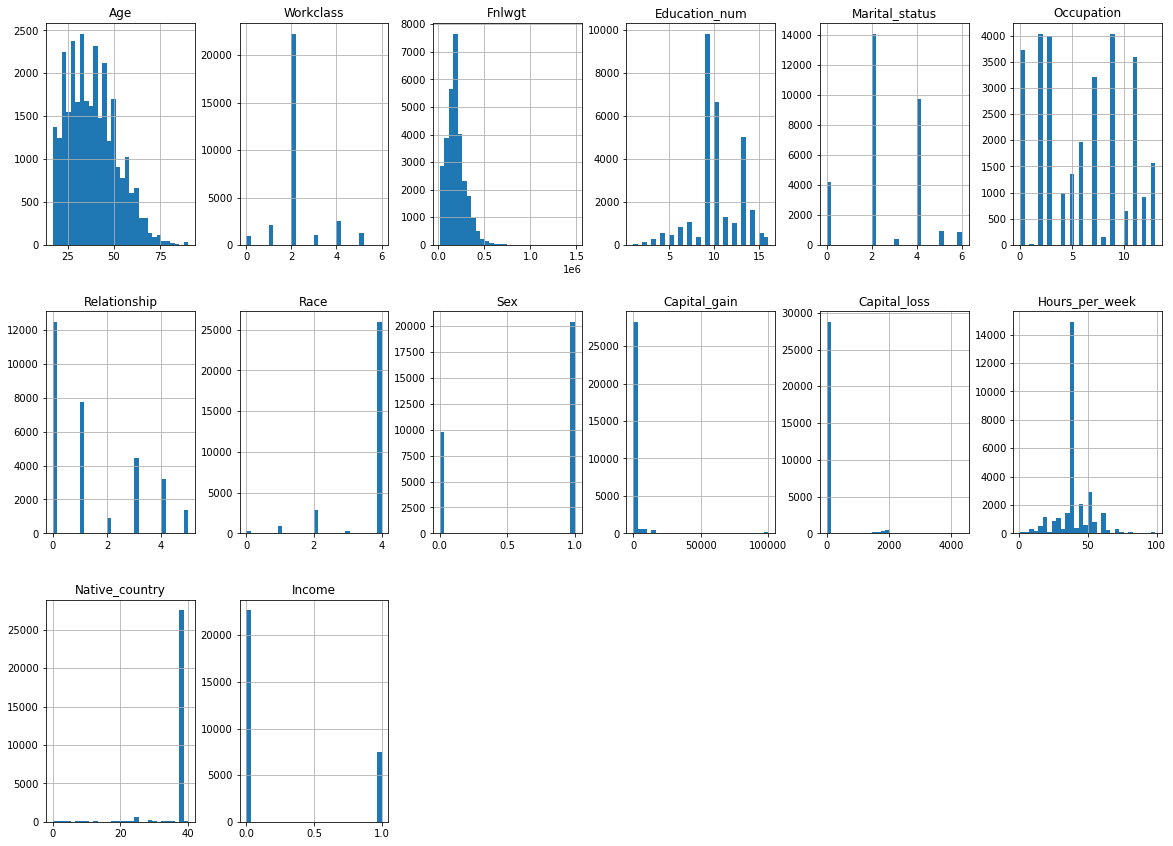

In [32]:
df.hist(figsize=(20,20),grid=True,layout=(4,6),bins=30)

Checking Correlation

In [35]:
df.corr()['Income'].sort_values()

Relationship     -0.251009
Marital_status   -0.193504
Fnlwgt           -0.008978
Workclass         0.018103
Native_country    0.023273
Occupation        0.051551
Race              0.071666
Capital_loss      0.150050
Sex               0.216715
Capital_gain      0.221200
Hours_per_week    0.229480
Age               0.242000
Education_num     0.335317
Income            1.000000
Name: Income, dtype: float64

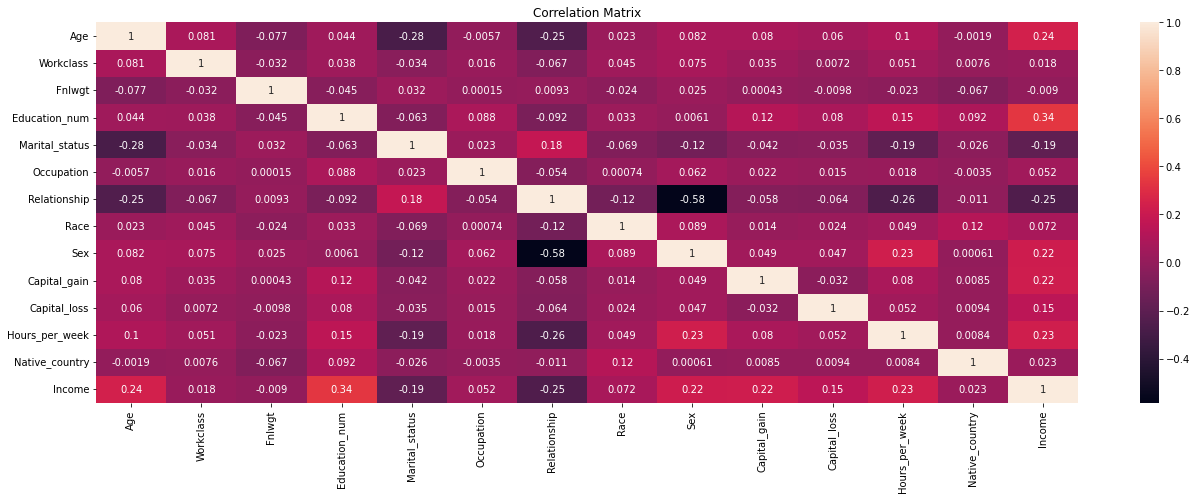

In [36]:
corr_mat = df.corr()
plt.figure(figsize=[22,7])
sns.heatmap(corr_mat,annot=True)
plt.title('Correlation Matrix')
plt.savefig('Correlation_matrix.jpg')
plt.show()

Checking multicollinearity

In [41]:
df.drop(['Education'],axis=1,inplace=True)

In [42]:
x = df.drop(['Income'],axis=1)
y = df['Income']

In [43]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)
X_scaled

array([[ 0.880275  ,  1.88801789, -1.00790871, ..., -0.21858977,
        -2.33149486,  0.26492864],
       [-0.03333799, -0.20888368,  0.24465878, ..., -0.21858977,
        -0.07773541,  0.26492864],
       [ 1.10867824, -0.20888368,  0.42520607, ..., -0.21858977,
        -0.07773541,  0.26492864],
       ...,
       [ 1.48935032, -0.20888368, -0.35861051, ..., -0.21858977,
        -0.07773541,  0.26492864],
       [-1.25148865, -0.20888368,  0.11067045, ..., -0.21858977,
        -1.74718685,  0.26492864],
       [ 1.03254383,  0.8395671 ,  0.92880758, ..., -0.21858977,
        -0.07773541,  0.26492864]])

In [44]:
vif = pd.DataFrame()
vif['vif'] = [variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif['Features'] = x.columns

vif

,vif,Features
0,1.158382,Age
1,1.015598,Workclass
2,1.014235,Fnlwgt
3,1.070933,Education_num
4,1.127503,Marital_status
5,1.013774,Occupation
6,1.674664,Relationship
7,1.034811,Race
8,1.566759,Sex
9,1.029036,Capital_gain


We can observe Multi colinearity doesnt exist.

Checking Skewness

In [45]:
df.skew()

Age                0.530223
Workclass          1.154786
Fnlwgt             1.459212
Education_num     -0.305328
Marital_status    -0.009387
Occupation         0.110420
Relationship       0.820275
Race              -2.506976
Sex               -0.750584
Capital_gain      11.902511
Capital_loss       4.526294
Hours_per_week     0.330856
Native_country    -4.178826
Income             1.161357
dtype: float64

In [46]:
columns = ('Workclass','Fnlwgt','Relationship','Race','Sex','Capital_gain','Capital_loss','Native_country')

for col in columns:
    if df.skew().loc[col]>0.55:
        df[col] = np.log1p(df[col])

In [47]:
df.skew()

Age               0.530223
Workclass        -0.884646
Fnlwgt           -0.838473
Education_num    -0.305328
Marital_status   -0.009387
Occupation        0.110420
Relationship      0.317904
Race             -2.506976
Sex              -0.750584
Capital_gain      3.073907
Capital_loss      4.272304
Hours_per_week    0.330856
Native_country   -4.178826
Income            1.161357
dtype: float64

We can observe skewness has been reduced and lies in rage between 0.009 to 4.2

Checking outliers

Age                  AxesSubplot(0.125,0.787927;0.352273x0.0920732)
Workclass         AxesSubplot(0.547727,0.787927;0.352273x0.0920732)
Fnlwgt               AxesSubplot(0.125,0.677439;0.352273x0.0920732)
Education_num     AxesSubplot(0.547727,0.677439;0.352273x0.0920732)
Marital_status       AxesSubplot(0.125,0.566951;0.352273x0.0920732)
Occupation        AxesSubplot(0.547727,0.566951;0.352273x0.0920732)
Relationship         AxesSubplot(0.125,0.456463;0.352273x0.0920732)
Race              AxesSubplot(0.547727,0.456463;0.352273x0.0920732)
Sex                  AxesSubplot(0.125,0.345976;0.352273x0.0920732)
Capital_gain      AxesSubplot(0.547727,0.345976;0.352273x0.0920732)
Capital_loss         AxesSubplot(0.125,0.235488;0.352273x0.0920732)
Hours_per_week    AxesSubplot(0.547727,0.235488;0.352273x0.0920732)
Native_country          AxesSubplot(0.125,0.125;0.352273x0.0920732)
Income               AxesSubplot(0.547727,0.125;0.352273x0.0920732)
dtype: object

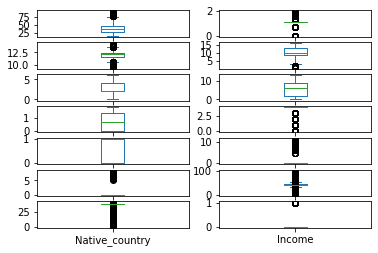

In [49]:
df.plot(kind='box',subplots=True,layout=(7,2))

We can observe outliers are present hence we will remove the outliers now.

In [60]:
z=np.abs(zscore(df))
threshold=3
np.where(z>3)

(array([    4,    37,    40, ..., 23503, 23618, 23619], dtype=int64),
 array([12, 12,  9, ...,  9, 12,  9], dtype=int64))

In [61]:
df_new = df[(z<3).all(axis=1)]
df_new

,Age,Workclass,Fnlwgt,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,1.609438,11.330348,13,2,3,0.000000,4,1,0.0,0.0,13,38,0
1,38,1.098612,12.281398,9,0,5,0.693147,4,1,0.0,0.0,40,38,0
2,53,1.098612,12.366157,7,2,5,0.000000,2,1,0.0,0.0,40,38,0
4,37,1.098612,12.558780,14,2,3,1.791759,4,0,0.0,0.0,40,38,0
6,52,1.609438,12.253161,9,2,3,0.000000,4,1,0.0,0.0,45,38,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32554,22,1.098612,12.644821,10,4,10,0.693147,4,1,0.0,0.0,40,38,0
32555,27,1.098612,12.458010,12,2,12,1.791759,4,0,0.0,0.0,38,38,0
32556,40,1.098612,11.947140,9,2,6,0.000000,4,1,0.0,0.0,40,38,1
32557,58,1.098612,11.931050,9,6,0,1.609438,4,0,0.0,0.0,40,38,0


In [52]:
df_new.shape

(23629, 14)

In [53]:
ab = ((30161-23629)/30161)*100
ab

21.657106859852128

As we can observe we cannot eleminate 21% data hence we will not remove outliers.

Balancing data in target column 'Income'.

!pip install -U imbalanced.learn

In [63]:
from imblearn.over_sampling import SMOTE

In [64]:
smt = SMOTE()
trainx,trainy=smt.fit_resample(x,y)

In [65]:
trainx.value_counts()

Age  Workclass  Fnlwgt  Education_num  Marital_status  Occupation  Relationship  Race  Sex  Capital_gain  Capital_loss  Hours_per_week  Native_country
38   2          207202  9              2               6           0             4     1    0             0             48              38                3
42   2          201728  10             2               10          0             4     1    0             0             40              38                3
52   2          123011  10             2               3           0             4     1    0             0             45              38                3
40   2          123306  11             2               9           0             4     1    0             0             40              38                3
41   3          204235  13             2               9           0             4     1    0             0             46              38                3
                                                                     

In [66]:
trainy.value_counts()

0    22653
1    22653
Name: Income, dtype: int64

In [67]:
model = [DecisionTreeClassifier(),SVC(),RandomForestClassifier(),KNeighborsClassifier(),LogisticRegression()]

for i in range(0,50):
    x_train,x_test,y_train,y_test = train_test_split(trainx,trainy,test_size=0.33,random_state=i)
    for models in model:
        models.fit(x_train,y_train)
        prediction = models.predict(x_test)
        accu_Score = accuracy_score(y_test,prediction)
        print("Accuracy score for random state: ", i, " is ",accu_Score)
print()
print()
print()
print()
print()

Accuracy score for random state:  0  is  0.8334559561233362
Accuracy score for random state:  0  is  0.5937395491940338
Accuracy score for random state:  0  is  0.8796067152698817
Accuracy score for random state:  0  is  0.7120593940204668
Accuracy score for random state:  0  is  0.6568791385191626
Accuracy score for random state:  1  is  0.8307805497960002
Accuracy score for random state:  1  is  0.5918667647648986
Accuracy score for random state:  1  is  0.8811450739080998
Accuracy score for random state:  1  is  0.7027623570329744
Accuracy score for random state:  1  is  0.655273894722761
Accuracy score for random state:  2  is  0.8325195639087687
Accuracy score for random state:  2  is  0.5924687311885493
Accuracy score for random state:  2  is  0.8794729449535148
Accuracy score for random state:  2  is  0.7068423516821617
Accuracy score for random state:  2  is  0.6596883151628654
Accuracy score for random state:  3  is  0.8324526787505853
Accuracy score for random state:  3  is  

We can observe the highest accuracy Score:0.8827503177045014 is at random state 8 and for model: RandomForestClassifier.

Best Parameter

In [70]:
x1_train,x1_test,y1_train,y1_test = train_test_split(trainx,trainy,test_size=0.33,random_state=8)
rfc = RandomForestClassifier()
parameters={'max_features': ['auto','sqrt','log2']}
gridsearch =GridSearchCV(rfc,parameters)
gridsearch.fit(x_train,y_train)
gridsearch.best_params_

{'max_features': 'auto'}

In [71]:
Rfc = RandomForestClassifier(max_features='auto')
Rfc.fit(x_train,y_train)
predictions = Rfc.predict(x_test)
AccScore = accuracy_score(y_test,predictions)
print("Accuracy Score is: ",AccScore)

Accuracy Score is:  0.8822821215972175


Accuracy score is 88% with RandomForestClassifier

In [72]:
score = cross_val_score(Rfc,x,y,cv=5)

In [73]:
print("Croos Val Score: ",score)
print("Mean Score: ",score.mean())
print("std Score: ",score.std())

Croos Val Score:  [0.85347257 0.84930371 0.85643236 0.8589191  0.85527188]
Mean Score:  0.8546799246496171
std Score:  0.0032172471587898835
